<a href="https://colab.research.google.com/github/hewness/ExData_Plotting1/blob/master/HW1%5CHewGordonHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>CSCI E-82</center>
## <center>HW 1  Dimensionality Reduction</center>
### <center>Due: Monday Sept 16, 2019 11:59pm EST</center>

#### Note that this is an individual homework to be completed without collaborations except through Piazza.  

#### We encourage you to make progress this weekend since the second homework will likely come out in a week before this one is due.



### Your name:




Gordon Hew

In [0]:
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np

from sklearn import manifold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Problem 1   (5 points total)

$$\mathbf{X} = \left[\begin{array}
{rrr}
1 & 2 & 3 \\
4 & 5 & 7 \\
8 & 10 & 12
\end{array}\right]
$$

$$\mathbf{Y} = \left[\begin{array}
{rrr}
1 & 2 & 1 \\
2 & 1 & 2  
\end{array}\right]
$$

### Problem 1a (3 points)
Compute YX<sup>T</sup>.  The answer can be computed by hand and written in Markdown like the above matrices, or computed in python.  Either way is acceptable.


In [0]:
X = [[1, 2, 3], [4, 5, 7], [8, 10, 12]]
Y = [[1, 2, 1], [2, 1, 2]]

Xt = np.transpose(X)

display(np.dot(Y, Xt))

array([[ 8, 21, 40],
       [10, 27, 50]])

### Problem 1b (2 points)

Compute X<sup>-1</sup>, the inverse of X.  We recommend that you use python for this one.

In [0]:
X = [[1, 2, 3], [4, 5, 7], [8, 10, 12]]
display(np.linalg.inv(X))

array([[-1.66666667,  1.        , -0.16666667],
       [ 1.33333333, -2.        ,  0.83333333],
       [ 0.        ,  1.        , -0.5       ]])

### Problem 2  (50 points total)

This problem goes through a combination of python data manipulations as well as the full math projection using PCA.  We have divided the problem into multiple parts.



### Problem 2a  (5 points)

Download and load in the data set from the UCI archive https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/.  Print the dimensions and the first few rows to demonstrate a successful load.

In [0]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data'

ecoli_column_names = ['sequence_name', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'class']
ecoli_df = pd.read_csv(url, delimiter = '\s+', names = ecoli_column_names, header = None, index_col = False)

display(ecoli_df.head())
display(ecoli_df.describe())

,sequence_name,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


,mcg,gvh,lip,chg,aac,alm1,alm2
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


### Problem 2b  (10 points)
Compute and print the covariance matrix for all columns excluding the first and last.  Rather than use the built-in function, compute this using python code for practice.  The following equation will suffice for this.

Cov(X, Y) = Σ ( Xi - X ) ( Yi - Y ) / (N-1) 


In [0]:
X = ecoli_df.iloc[:,1:8].values
y = ecoli_df.iloc[:,8].values

X_scaled = StandardScaler().fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = ['mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2'])

In [0]:
def compute_cov(df, column_names):
  n = len(df.index)

  covs = list()

  for x_col_name in column_names:
    x_mean = np.mean(df[x_col_name])
    x = df[x_col_name]
    
    xy_covs = list()
    
    for y_col_name in column_names:
      y_mean = np.mean(df[y_col_name])
      y = df[y_col_name]
      
      cov = 0
      
      for i in range(0, x.size):
        cov += ((x[i] - x_mean)*(y[i] - y_mean)) / (n - 1)
      
      xy_covs.append(cov)
    
    covs.append(xy_covs)

  C = pd.DataFrame(covs, columns = column_names, index = column_names)
  return C

ecoli_numeric_column_names = ['mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2']
C = compute_cov(X_scaled_df, ecoli_numeric_column_names)
display(C)

assert np.allclose(C, X_scaled_df.cov()), 'computed covariance and numpy computed covariance should be equal'

,mcg,gvh,lip,chg,aac,alm1,alm2
mcg,1.002985,0.456163,0.147280,0.070475,0.221358,0.398164,0.167585
gvh,0.456163,1.002985,0.043935,0.018521,0.070033,0.174010,-0.120558
lip,0.147280,0.043935,1.002985,0.312882,0.070400,0.096074,-0.057742
chg,0.070475,0.018521,0.312882,1.002985,-0.044859,-0.007677,-0.052344
aac,0.221358,0.070033,0.070400,-0.044859,1.002985,0.280317,0.253429
alm1,0.398164,0.174010,0.096074,-0.007677,0.280317,1.002985,0.811740
alm2,0.167585,-0.120558,-0.057742,-0.052344,0.253429,0.811740,1.002985


### Problem 2c  (10 points)

Compute the decomposition of the covariance matrix using singular value decomposition.  Using a python function is definitely the way to go here.

In [0]:
u, s, vh = np.linalg.svd(C)

print('u:', u)
print('s:', s)
print('vh:', vh)

assert np.allclose(C.values, np.dot(u, np.dot(s * np.eye(7),  vh)))

u: [[-0.43301833  0.37265574 -0.29219921  0.06707282 -0.00490985  0.75965086
   0.08154845]
 [-0.22398568  0.47029644 -0.55288668  0.14655068  0.05019625 -0.60363588
   0.18599716]
 [-0.10951653  0.48177748  0.49223261 -0.20125402 -0.67128037 -0.10724976
   0.10478843]
 [-0.01816912  0.45560856  0.5451792   0.20553058  0.67163159 -0.03639389
  -0.01462969]
 [-0.34590722 -0.04745278 -0.00818155 -0.88426143  0.29459176 -0.09557701
  -0.01385432]
 [-0.6070701  -0.16428058  0.11045841  0.24341844 -0.09365082 -0.16949665
  -0.70393508]
 [-0.51167924 -0.4135461   0.23907035  0.22384663  0.01396843 -0.08867463
   0.67219322]]
s: [2.21220928 1.46555238 1.20508931 0.85971779 0.671441   0.48008494
 0.12680082]
vh: [[-0.43301833 -0.22398568 -0.10951653 -0.01816912 -0.34590722 -0.6070701
  -0.51167924]
 [ 0.37265574  0.47029644  0.48177748  0.45560856 -0.04745278 -0.16428058
  -0.4135461 ]
 [-0.29219921 -0.55288668  0.49223261  0.5451792  -0.00818155  0.11045841
   0.23907035]
 [ 0.06707282  0.146

### Problem 2d  (10 points)

Compute the projection of the raw data onto the appropriate two eigenvectors.  Consider which columns should be projected and the normalizations.

In [0]:
eigenvalues, eigenvectors = np.linalg.eigh(C)

idx = np.argsort(-eigenvalues)
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

matrix_w = eigenvectors[:,:2]

print('Eigenvalues\n', eigenvalues)
print('Eigenvectors\n', eigenvectors)

U = eigenvectors
S = eigenvalues * np.eye(7)
V = U.T
D = np.dot(U, np.dot(S,  V))

assert np.allclose(C.values, D)

Eigenvalues
 [2.21220928 1.46555238 1.20508931 0.85971779 0.671441   0.48008494
 0.12680082]
Eigenvectors
 [[-0.43301833  0.37265574 -0.29219921 -0.06707282 -0.00490985  0.75965086
  -0.08154845]
 [-0.22398568  0.47029644 -0.55288668 -0.14655068  0.05019625 -0.60363588
  -0.18599716]
 [-0.10951653  0.48177748  0.49223261  0.20125402 -0.67128037 -0.10724976
  -0.10478843]
 [-0.01816912  0.45560856  0.5451792  -0.20553058  0.67163159 -0.03639389
   0.01462969]
 [-0.34590722 -0.04745278 -0.00818155  0.88426143  0.29459176 -0.09557701
   0.01385432]
 [-0.6070701  -0.16428058  0.11045841 -0.24341844 -0.09365082 -0.16949665
   0.70393508]
 [-0.51167924 -0.4135461   0.23907035 -0.22384663  0.01396843 -0.08867463
  -0.67219322]]


### Problem 2e  (10 points)

Plot the projected points such that the 8 different classes can be visually identified.  Be sure to label the classes and axes.  Comment on the quality of the separation of the different classes using PCA.

In [0]:
def plot_projection(projection, y, title, y_label, x_label):  
  plt.figure(figsize=(16, 8))
  plt.title(title)

  classes = list(set(y))
  # maintain color mapping deterministically
  classes.sort()

  colors = ['b', 'g', 'r', 'c', 'm', 'y', 'orange']

  for y_class, color in zip(classes, colors):
      plt.scatter(projection[y == y_class, 0], projection[y == y_class, 1], label = y_class, c = color, alpha = 0.8)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()
  plt.grid()
  plt.show()

def get_ecoli_XY(ecoli_df):
  X = ecoli_df.iloc[:,1:8].values
  y = ecoli_df.iloc[:,8].values
  X_scaled = StandardScaler().fit_transform(X)
  return X, y, X_scaled    

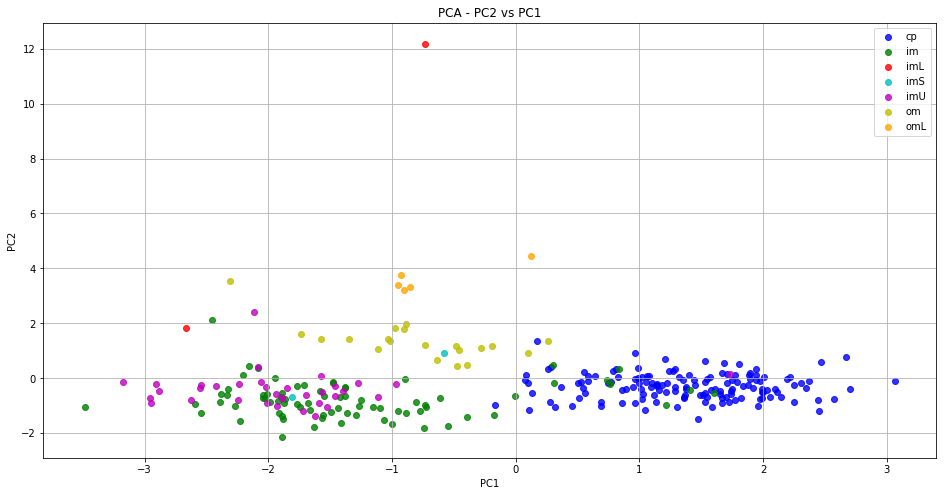

In [0]:
X_pca = X_scaled.dot(matrix_w)
plot_projection(X_pca, y, 'PCA - PC2 vs PC1', 'PC2', 'PC1')

# pca = PCA(n_components = 2)
# X_pca = pca.fit_transform(X_scaled)
# plot_projection(X_pca, y, 'PCA - PC2 vs PC1', 'PC2', 'PC1')

The sepration of classes of this PCA analysis is distinct between for some classes but not others. For example, im data points are dispersed amongst both cp and imU data points.

### Problem 2f (5 points)

The PCA that you have just completed takes each data point and projects it using a weighted sum of features.  One could also do the opposite to map the features as a weighted sum of the data entries.  How could this be done?  What is a potential issue? Describe these in a few sentences (do not code it).

By mapping the features to the weighted sum of the data entries, we are no longer trying to extract features from the data but trying to describe features using the data. I believe this could be done by using the covariance of the weighted sum of the data entries to describe each feature and link each completed feature together. The potential issue is that the newly described feature could include skewed and outlier data resulting in features that can impact model building and data analysis.

### Problem 3  MDS  (5 points)

For the same data set, repeat 2e using sklearn's Multidimensional scaling algorithm.  

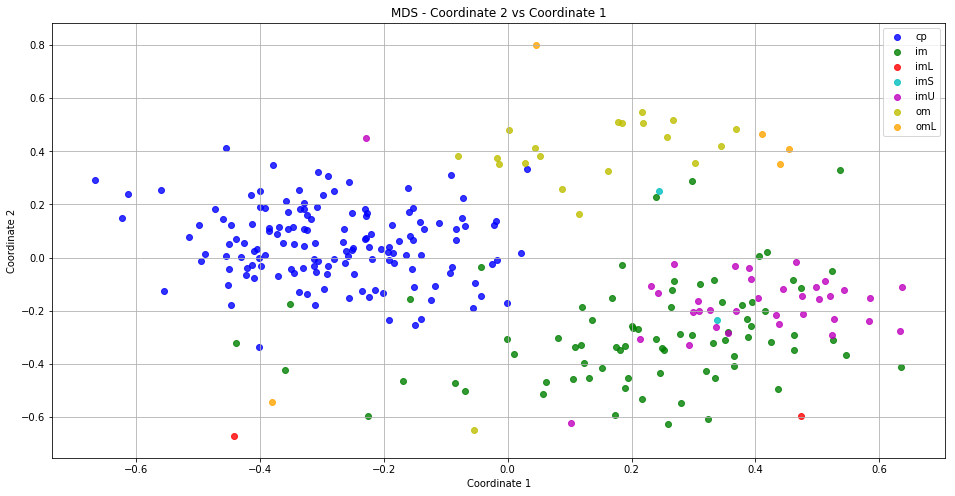

In [0]:
X, y, X_scaled = get_ecoli_XY(ecoli_df)

mds = manifold.MDS(n_components=2, max_iter=100, random_state=82)
X_mds = mds.fit_transform(X)

plot_projection(X_mds, y, 'MDS - Coordinate 2 vs Coordinate 1', 'Coordinate 2', 'Coordinate 1')

The separation of classes appears slightly better in MDS compared to PCA. im data points are now mostly comingled with imU data points and no longer cp data points.

### Problem 4  (15 points total)

### Problem 4a  t-SNE  (5 points)

Repeat 2e using a t-SNE plot with the default settings.

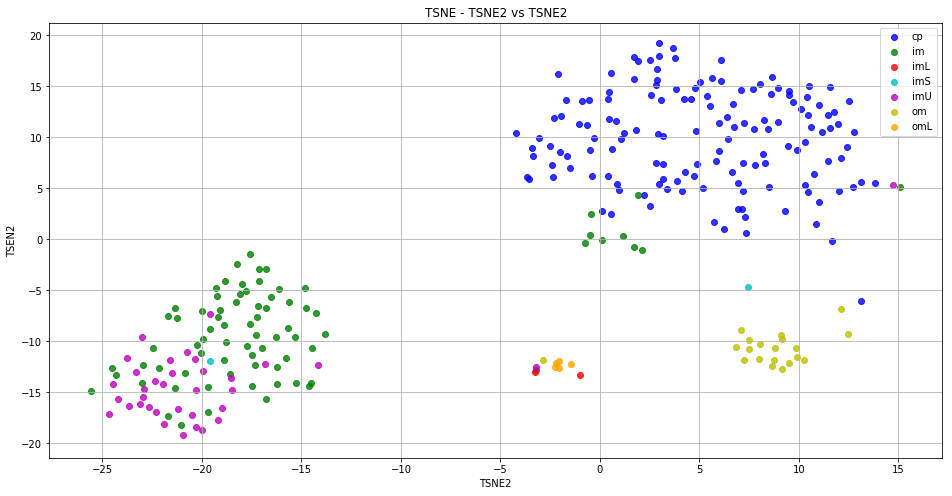

In [0]:
X, y, X_scaled = get_ecoli_XY(ecoli_df)

tsne = manifold.TSNE(n_components=2, random_state=82)
X_tsne = tsne.fit_transform(X_scaled)

plot_projection(X_tsne, y, 'TSNE - TSNE2 vs TSNE2', 'TSEN2', 'TSNE2')

t-SNE appears to provide larger a separation of classes compared to MDS and PCA, most notably amongst cp and imU and im data.

### Problem 4b t-SNE perplexity  (5 points)

Try out a few t-SNE plots by varying the perplexity.  State the best perplexity for separating the 8 different classes and describe your rationale in a sentence or two.  Report the average calculation time for the t-SNE projection over a number of iterations.

In [0]:
def compute_tsne(X_scaled, perplexities, random_state = 82):
  timings = list()
  X_tsnes = list()

  for perplexity in perplexities:
    starttime = time.time()
    tsne = manifold.TSNE(n_components = 2, random_state = random_state, perplexity = perplexity)
    X_tsne = tsne.fit_transform(X_scaled)
    endtime = time.time()
    timings.append(endtime - starttime)
    X_tsnes.append(X_tsne)

  return X_tsnes, timings

perplexities = [5, 10, 20, 40, 60, 80]
X, y, X_scaled = get_ecoli_XY(ecoli_df)
X_tsnes, timings = compute_tsne(X_scaled, perplexities, random_state = 82)

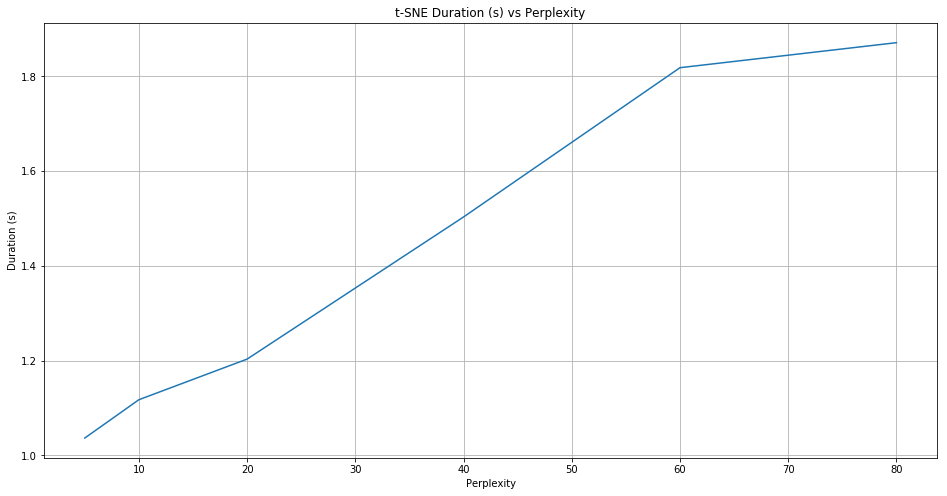

In [0]:
plt.figure(figsize=(16, 8))
plt.title('t-SNE Duration (s) vs Perplexity')
plt.plot(perplexities, timings)
plt.xlabel('Perplexity')
plt.ylabel('Duration (s)')
plt.grid()
plt.show()

We observe a linear relationship between perplexity and duration. As perplexity increases, the amount of time to run the t-SNE analysis also increases.

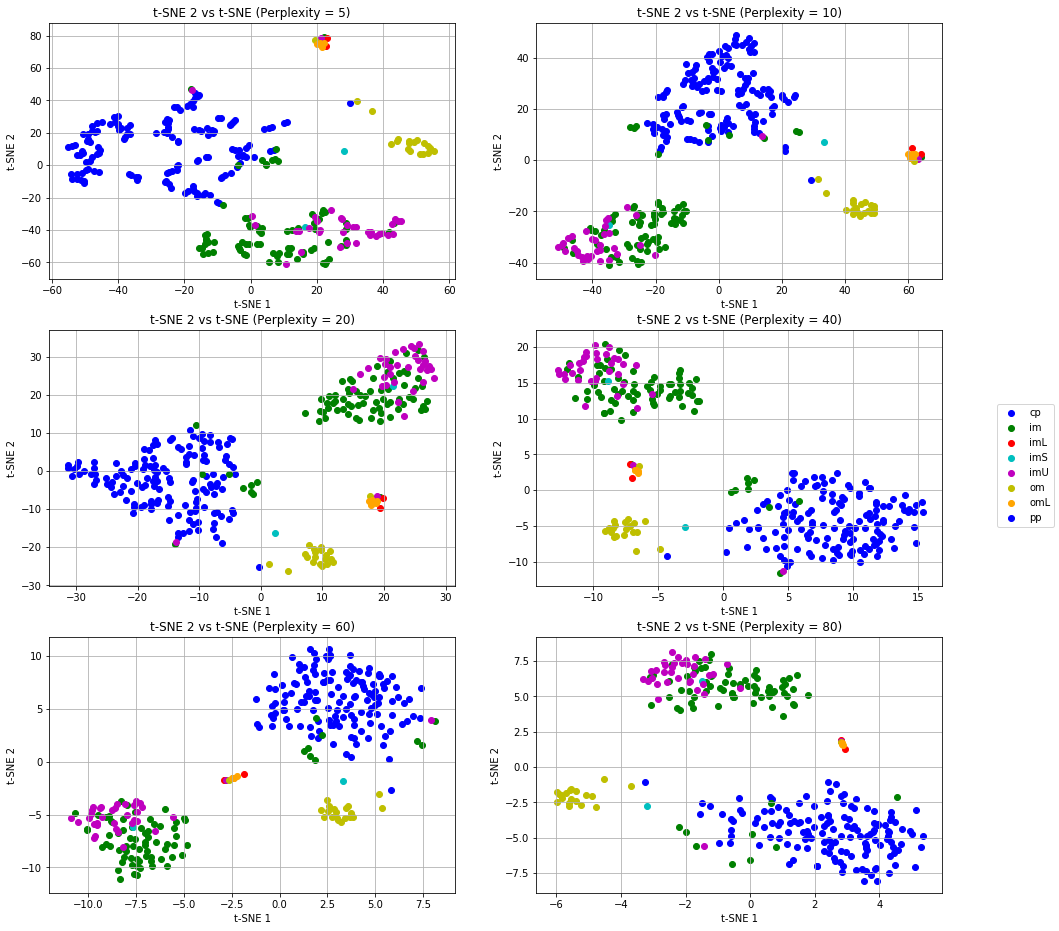

In [0]:
def plot_tsne(y, X_tsnes, perplexities):
  fig, axes = plt.subplots(3, 2, figsize=(16, 16))

  classes = list(set(y))
  classes.sort()

  colors = ['b', 'g', 'r', 'c', 'm', 'y', 'orange']

  row = 0
  column = 0

  lines = list()

  for p_idx, perplexity in enumerate(perplexities):
    X_tsne = X_tsnes[p_idx]

    for y_class, color in zip(classes, colors):
        ax = axes[row, column]
        ax.set_title('t-SNE 2 vs t-SNE (Perplexity = {})'.format(perplexity))
        ax.grid()
        ax.set_ylabel('t-SNE 2')
        ax.set_xlabel('t-SNE 1')
        line = ax.scatter(X_tsne[y == y_class, 0], X_tsne[y == y_class, 1], label = y_class, c = color)
        lines.append(line)

    if p_idx != 0 and p_idx % 2 == 1:
      row += 1
      column = 0
    else:
      column = 1

  fig.legend(lines, classes, loc = 'center right' )

  plt.show()

plot_tsne(y, X_tsnes, perplexities)

Seperation between classes appears to stop improving when perplexity is greater than 10. However, dispersion between in a class appears to increase until when perplexity is equal to 20.

### Problem 4c  t-SNE randomization (10 points)

The S of t-SNE means stochastic or random, usually as a function of time.  Explore whether you can reproduce the result in 4b through a second projection and plot.

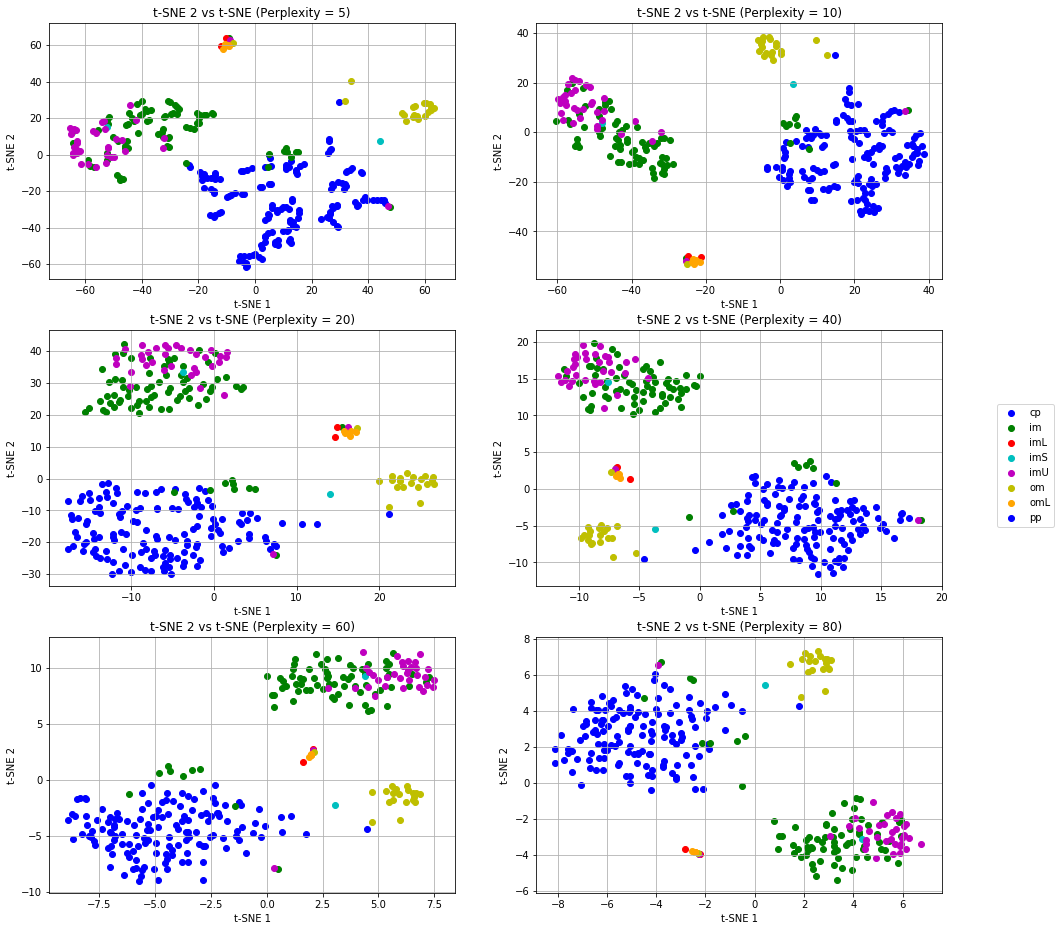

In [0]:
X_tsnes, timings = compute_tsne(X_scaled, perplexities, random_state = 109)
plot_tsne(y, X_tsnes, perplexities)

Using a different random state for the t-SNE analysis, we see plots that similar to 4b but are not identical.

### Problem 5  (15 points)

### Problem 5a (10 points)

Create a visualization for this data or another data set.  Although it goes without saying, this should be your original view of some data and not something that we can find online.

In [0]:
# Data was originally retrieved from Kaggle's open data sets - https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/metadata
url = 'https://raw.githubusercontent.com/hewness/csci_e-82/master/HW1/AB_NYC_2019.csv?token=ABFCMMCGKV6KWFQENAF2UZK5P2S4S'
air_bnb_df = pd.read_csv(url)
air_bnb_df = air_bnb_df.fillna({'reviews_per_month': 0})
display(air_bnb_df.head())
display(air_bnb_df.describe())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [0]:
airbnb_numeric_columns = ['latitude', 'longitude', 'price', 'minimum_nights',	'number_of_reviews', 'reviews_per_month', 'availability_365']

X = air_bnb_df[airbnb_numeric_columns].values
y = air_bnb_df['neighbourhood_group'].values

X_scaled = StandardScaler().fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = airbnb_numeric_columns)

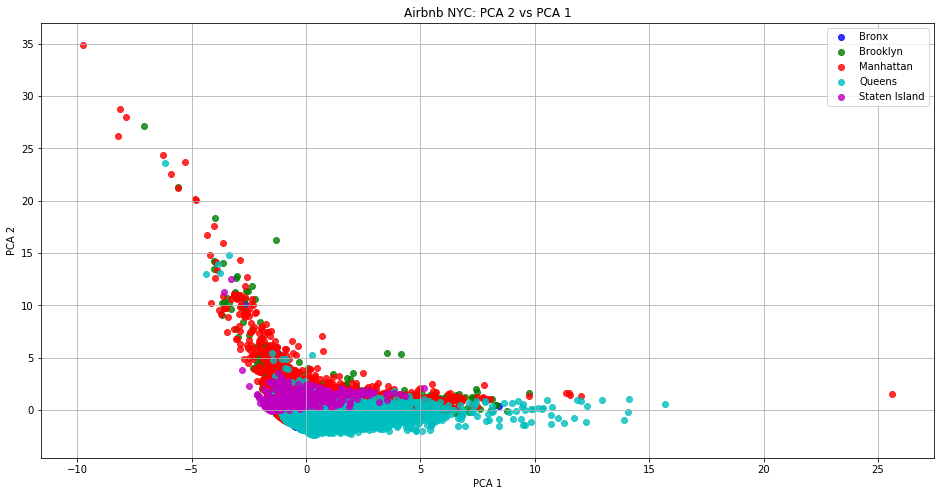

In [0]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

plot_projection(X_pca, y, 'Airbnb NYC: PCA 2 vs PCA 1', 'PCA 2', 'PCA 1')

### Problem 5b (5 points)

Tell me one story in 2-3 sentences that the data shows. 

The above PCA shows that Manhattan Airbnb listings are more influenced by PCA 2 while Queens listings are more influenced by PCA 1 leaving Staten Island sandwiched between the two clusters. The Brooklyn and Bronx data points appear to be interspersed or covered by data from the other boroughs.

### How many hours did this homework take? (5 points)  

This will not affect your grade (unless you don't answer it).  We will be monitoring time spent on homework to be sure that we are not over-burdening students.

The homework took approximately 12 hours including time spent reviewing lecture/section material and reading additional materials to try to further my understanding of these techniques.

### Last step (5 points)

Save this notebook as LastnameFirstnameHW1.ipynb such as MuskElonHW1.ipynb.   Create a pdf of this notebook named similarly.  Submit both the python notebook and the pdf version to the Canvas dropbox.  We require both versions.